In [8]:
import bare
import hsfm

## Pre-process the imagery

In [2]:
camera_positions_file_name = 'input_data/targets.csv'
template_directory = '../../data/notch_templates'
out_dir='output_data/images'
subset = (62,68)

Processing NAGAP_77V6_062
Principal point intersection angle: 90.05569065965483
Processing NAGAP_77V6_063
Principal point intersection angle: 90.03033016510568
Processing NAGAP_77V6_064
Principal point intersection angle: 90.02533598484175
Processing NAGAP_77V6_065
Principal point intersection angle: 90.0355364132671
Processing NAGAP_77V6_066
Principal point intersection angle: 90.03552428649243
Processing NAGAP_77V6_067
Principal point intersection angle: 90.03043866945227
Processing NAGAP_77V6_068
Principal point intersection angle: 90.02527993713696


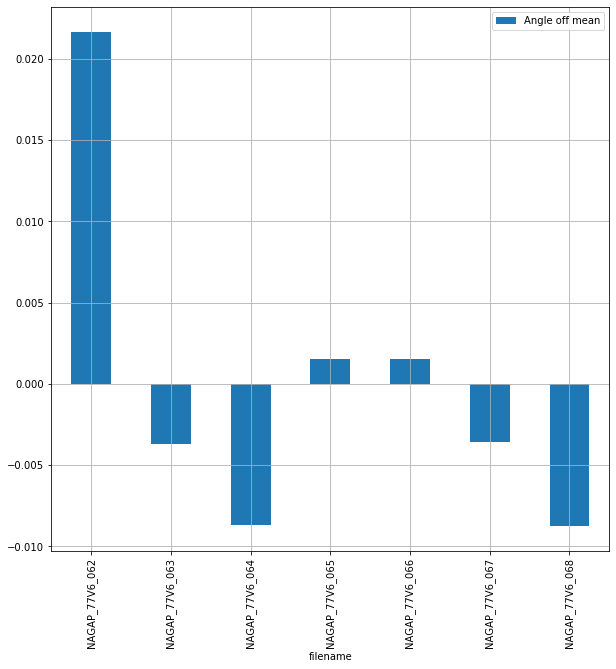

Mean rotation off 90 degree intersection at principal point: 0.0340194451358542
Further QC plots for principal point and fiducial marker detection available under qc/image_preprocessing/
CPU times: user 1min 26s, sys: 24.8 s, total: 1min 51s
Wall time: 8min 54s


'output_data/images'

In [5]:
%%time
hsfm.batch.preprocess_images(template_directory,
                             camera_positions_file_name=camera_positions_file_name,
                             output_directory=out_dir,
                             subset=subset,
                             qc=True)

#### Additional useful methods

Download raw tiff for offline processing or thumbnail images for quick viewing

In [3]:
# camera_positions_file_name = 'input_data/targets.csv'
# out_dir='output_data/tn_raw_images'
# subset = (62,68)
# image_type='pid_tn' # pid_tiff, pid_jpeg
# image_directory = hsfm.batch.download_images_to_disk(camera_positions_file_name, 
#                                                     subset=subset, 
#                                                     output_directory=out_dir,
#                                                     image_type=image_type)

Preprocess from folder on disk

In [ ]:
# out_dir='output_data/images'
# template_directory = '../../data/notch_templates'
# hsfm.batch.preprocess_images(template_directory,
#                              image_directory=image_directory,
#                              output_directory=out_dir,
#                              qc=True)

## Download coarse SRTM reference DEM for initial camera generation

In [10]:
output_directory = '../../data/reference_dems/baker'

LLLON = -121.90
LLLAT = 48.65
URLON = -121.60
URLAT = 48.85

In [11]:
%%time
hsfm.utils.download_srtm(LLLON,
                         LLLAT,
                         URLON,
                         URLAT,
                         output_directory=output_directory,
                         verbose=False)

CPU times: user 11.9 ms, sys: 27.5 ms, total: 39.4 ms
Wall time: 37.9 s


'../../data/reference_dems/baker/SRTM3/cache/srtm_subset_utm_geoid_adj.tif'

#### Optional QC:

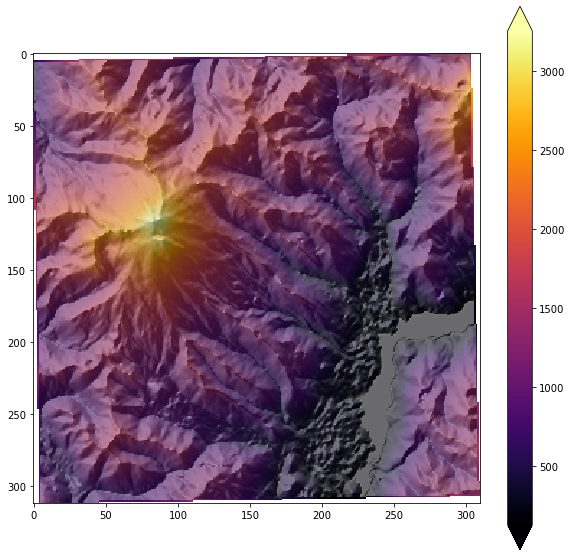

In [12]:
# Checkout reference DEM
reference_dem = '../../data/reference_dems/baker/SRTM3/cache/srtm_subset_utm_geoid_adj.tif'
hsfm.plot.plot_dem_from_file(reference_dem)

## Generate camera models

In [17]:
# TODO
# - Try automated IP matching with tiled basemap to get match point coordinates, from which 
#   camera model can be generated.

In [4]:
image_directory = 'output_data/images'
reference_dem = '../../data/reference_dems/baker/SRTM3/cache/srtm_subset_utm_geoid_adj.tif'
camera_positions_file_name = './input_data/targets.csv'
focal_length_mm = 151.303
camera_model_output_directory = './output_data/cameras'

In [17]:
# TODO
# - Add exception flow to launch manual heading picker. If manual_heading_selection=True, 
#   selection will be required for all images
hsfm.batch.batch_generate_cameras(image_directory,
                                  camera_positions_file_name,
                                  reference_dem,
                                  focal_length_mm,
                                  output_directory = camera_model_output_directory,
                                  subset=subset,
                                  print_asp_call=True,
                                  manual_heading_selection=False)

cam_gen output_data/images/NAGAP_77V6_062.tif --reference-dem ../../data/reference_dems/baker/SRTM3/cache/srtm_subset_utm_geoid_adj.tif --focal-length 7565.15 --optical-center 5625.0 5625.0 --pixel-pitch 1 --refine-camera -o ./output_data/cameras/NAGAP_77V6_062.tsai --lon-lat-values -121.85163595992631,48.73477975398637,-121.82137210846302,48.73339547090641,-121.82346985415818,48.71337655261127,-121.85372177139253,48.71476019788363
cam_gen output_data/images/NAGAP_77V6_063.tif --reference-dem ../../data/reference_dems/baker/SRTM3/cache/srtm_subset_utm_geoid_adj.tif --focal-length 7565.15 --optical-center 5625.0 5625.0 --pixel-pitch 1 --refine-camera -o ./output_data/cameras/NAGAP_77V6_063.tsai --lon-lat-values -121.85365509580227,48.74084905165932,-121.82332375949714,48.74133797556049,-121.82259078437446,48.721276886081,-121.852910054885,48.72078806113605
cam_gen output_data/images/NAGAP_77V6_064.tif --reference-dem ../../data/reference_dems/baker/SRTM3/cache/srtm_subset_utm_geoid_adj.

#### Optional QC

In [18]:
# TODO
# - plot camera position before cam_gen
# - plot these three plots side by side
# - Interpolate DEM value around corner coordinate and re-run cam_gem 
#   to produce gcp in case no intersection with DEM found.

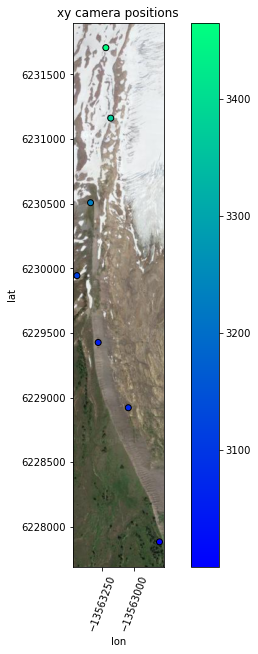

In [19]:
camera_positions = bare.plot.camera_models_to_ctx_df(camera_model_output_directory)
bare.plot.plot_xy_camera_positions(camera_positions, output_directory=None)

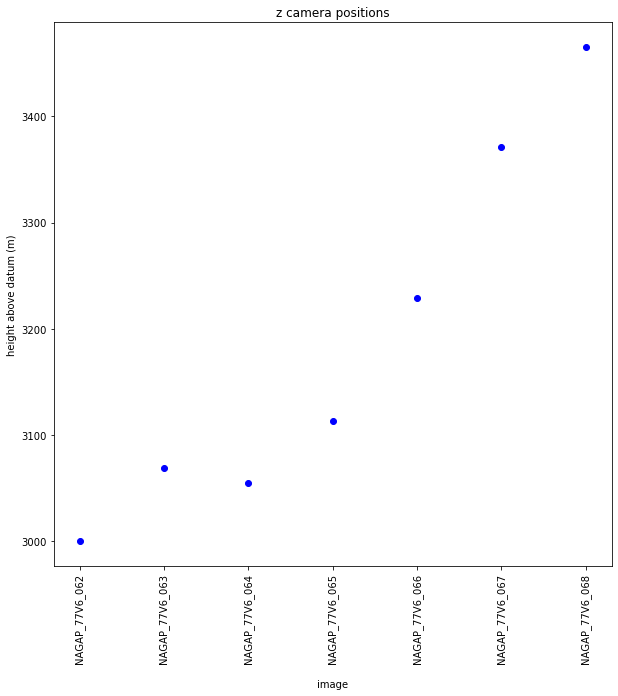

In [20]:
bare.plot.plot_z_camera_positions(camera_positions, output_directory=None)

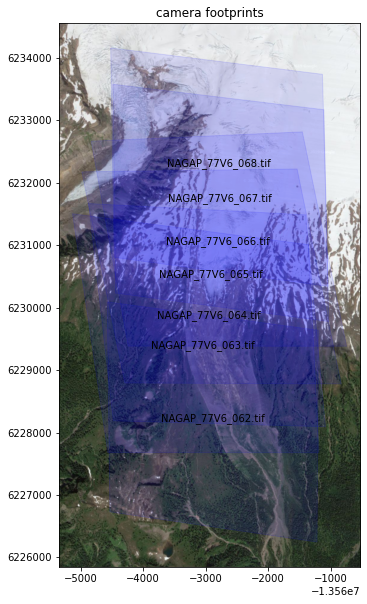

In [9]:
reference_dem = '../../data/reference_dems/baker/SRTM3/cache/srtm.vrt'
bare.batch.plot_footprints(camera_model_output_directory, 
                           image_directory, 
                           reference_dem,
                           show=True)

## Rescale images (optional)

In [13]:
image_directory = './output_data/images'
scale = 8

In [14]:
hsfm.batch.rescale_images(image_directory, scale=scale)

'/Users/knuth/Downloads/hsfm_processing/in_process/easton_1977/output_data/images_sub8'

## Rescale cameras (optional)

In [17]:
camera_directory = './output_data/cameras'
scale = 8

In [18]:
hsfm.batch.rescale_tsai_cameras(camera_directory, scale=scale)

## Run bundle adjust

In [9]:
image_files_directory = 'output_data/images_sub8'
camera_files_directory = 'output_data/cameras_sub8'
output_directory_prefix = 'output_data/ba/run'
bundle_adjust_output_directory = 'output_data/ba'

In [22]:
%%time
hsfm.asp.bundle_adjust_custom(image_files_directory, 
                              camera_files_directory, 
                              output_directory_prefix)

Bundle adjust results saved in output_data/ba
CPU times: user 132 ms, sys: 111 ms, total: 243 ms
Wall time: 11min 34s


'output_data/ba'

#### Optional QC

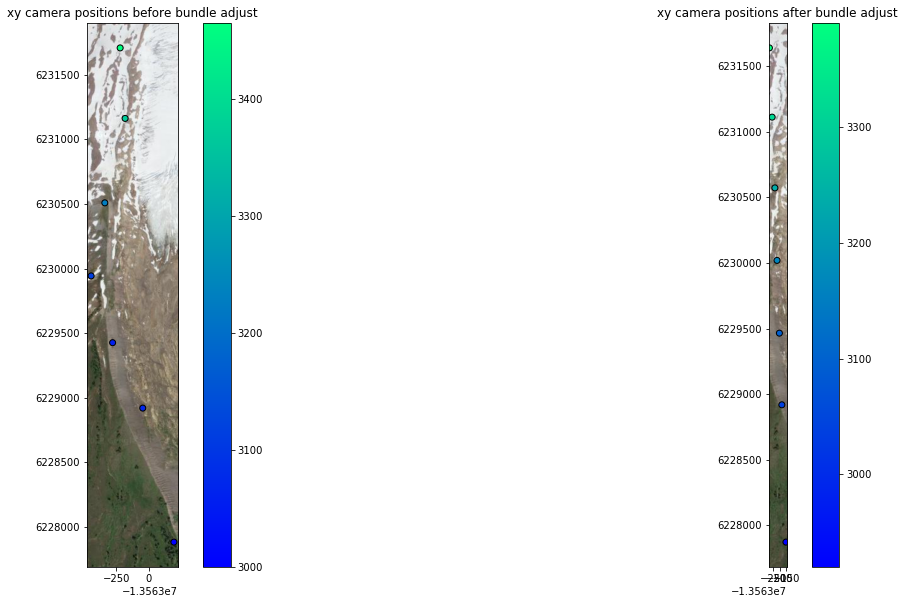

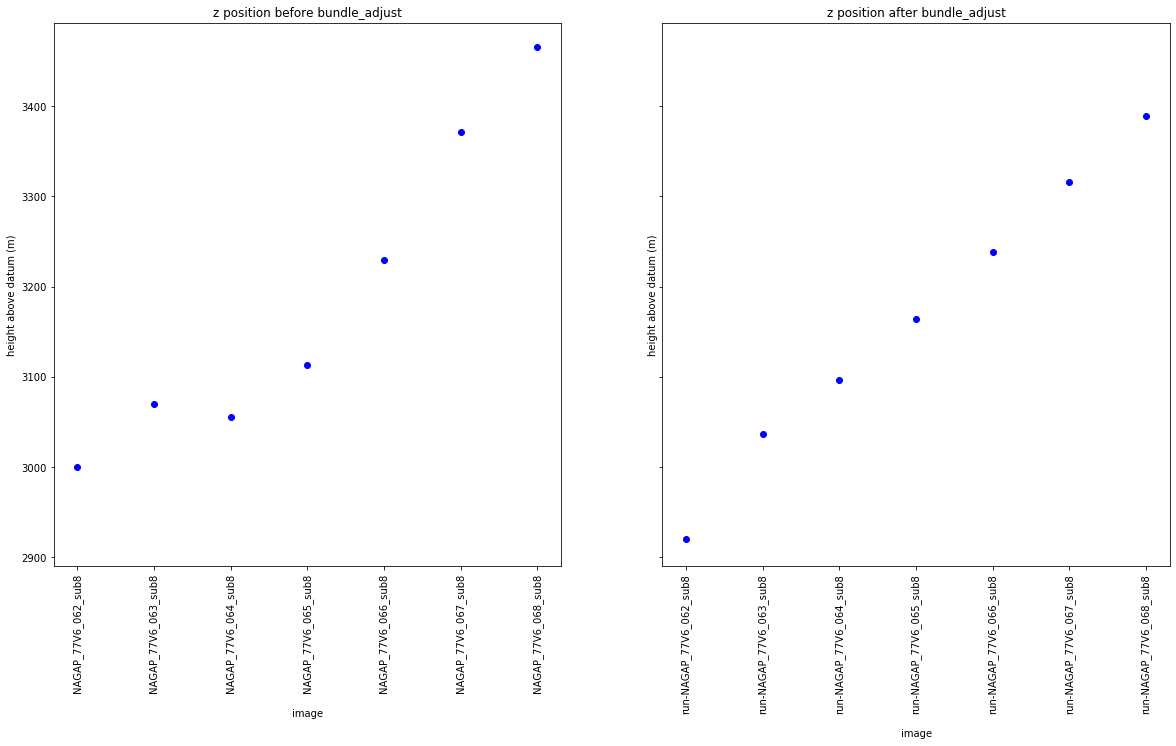

In [23]:
bare.plot.plot_tsai_camera_positions_before_and_after(bundle_adjust_output_directory,camera_files_directory)

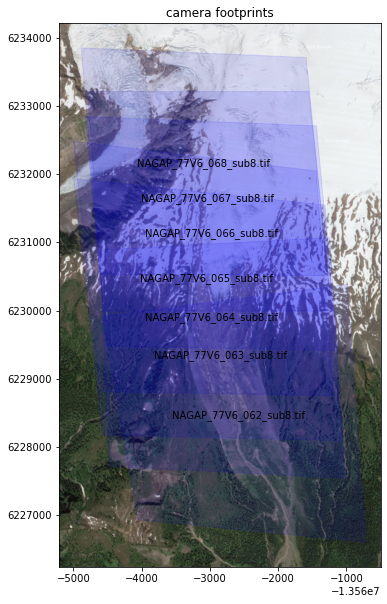

In [10]:
reference_dem = '../../data/reference_dems/baker/SRTM3/cache/srtm_subset_utm_geoid_adj.tif'
bare.batch.plot_footprints(bundle_adjust_output_directory, 
                           image_files_directory, 
                           reference_dem,
                           output_directory='qc/camera_footprints_after_bundle_adjust',
                           show=True)

## Run pairwise stereo

In [25]:
bundle_adjust_output_directory = 'output_data/ba/'
image_prefix = 'NAGAP_77V6_0'
stereo_input_directory = 'output_data/stereo_inputs/'

In [26]:
%%time
hsfm.core.move_match_files_in_sequence(bundle_adjust_output_directory, 
                                       image_prefix, 
                                       stereo_input_directory, 
                                       subset)

hsfm.core.move_camera_files_in_sequence(bundle_adjust_output_directory,
                                        image_prefix,
                                        stereo_input_directory,
                                        subset,
                                        extension='.tsai')

Match files copied to output_data/stereo_inputs/
Camera files copied to output_data/stereo_inputs/
CPU times: user 1.58 ms, sys: 5.26 ms, total: 6.83 ms
Wall time: 17.6 ms


In [27]:
stereo_input_directory = 'output_data/stereo_inputs/'
camera_files_directory = 'output_data/stereo_inputs/'
image_files_directory = 'output_data/images_sub8'
stereo_output_directory_prefix = 'output_data/stereo_run'

In [28]:
%%time
hsfm.asp.iter_stereo_pairs(stereo_input_directory,
                           image_files_directory,
                           camera_files_directory,
                           stereo_output_directory_prefix,
                           image_extension = '.tif',
                           camera_extension = '.tsai')

Running parallel stereo on output_data/images_sub8/NAGAP_77V6_062_sub8.tif and output_data/images_sub8/NAGAP_77V6_063_sub8.tif
Parallel stereo results saved in output_data/stereo_run/NAGAP_77V6_062_sub8__NAGAP_77V6_063_sub8
Running parallel stereo on output_data/images_sub8/NAGAP_77V6_063_sub8.tif and output_data/images_sub8/NAGAP_77V6_064_sub8.tif
Parallel stereo results saved in output_data/stereo_run/NAGAP_77V6_063_sub8__NAGAP_77V6_064_sub8
Running parallel stereo on output_data/images_sub8/NAGAP_77V6_064_sub8.tif and output_data/images_sub8/NAGAP_77V6_065_sub8.tif
Parallel stereo results saved in output_data/stereo_run/NAGAP_77V6_064_sub8__NAGAP_77V6_065_sub8
Running parallel stereo on output_data/images_sub8/NAGAP_77V6_065_sub8.tif and output_data/images_sub8/NAGAP_77V6_066_sub8.tif
Parallel stereo results saved in output_data/stereo_run/NAGAP_77V6_065_sub8__NAGAP_77V6_066_sub8
Running parallel stereo on output_data/images_sub8/NAGAP_77V6_066_sub8.tif and output_data/images_sub8/N

#### Optional QC

In [29]:
# TODO
# plot pairwise dems differenced against high-resolution reference dem to get a sense of individual error

## Mosaic the outputs

In [30]:
stereo_output_directories_parent = 'output_data/stereo_run/'
output_file_name = 'output_data/mosaic.tif'

In [31]:
%%time
hsfm.asp.dem_mosaic_custom(stereo_output_directories_parent,
                           output_file_name)

CPU times: user 6.82 ms, sys: 6.23 ms, total: 13 ms
Wall time: 2.94 s


#### Optional QC

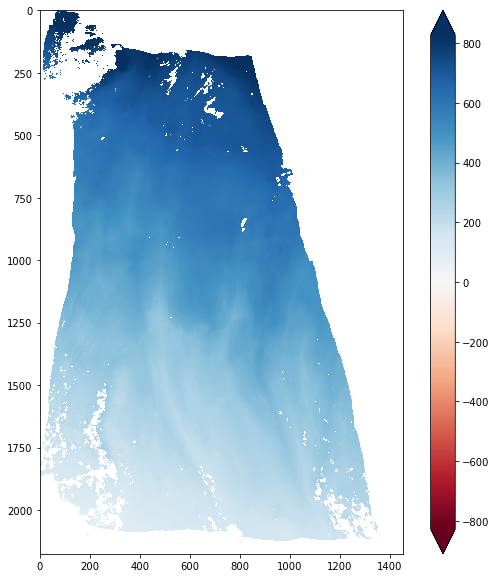

In [32]:
# plot difference between mosaic and high-resolution reference DEM
reference_dem_file_name = '../data/baker_1_m/baker_2015_utm_m.vrt'
mosaic_file_name = 'output_data/mosaic.tif'
dem_difference_file_name =  hsfm.utils.difference_dems(mosaic_file_name, reference_dem_file_name)
hsfm.plot.plot_dem_difference_from_file_name(dem_difference_file_name)

### Use pc_align to align mosaic with high-resolution reference DEM

In [33]:
input_dem_file_name = 'output_data/mosaic.tif'
reference_dem_file_name = '../data/baker_1_m/baker_2015_utm_m.vrt'
output_directory_prefix = 'output_data/pc_align_output/run'

In [34]:
%%time
dem_file_name = hsfm.asp.pc_align_custom(input_dem_file_name,
                                                 reference_dem_file_name,
                                                 output_directory_prefix,
                                                 verbose=False)

CPU times: user 14.1 ms, sys: 30.6 ms, total: 44.6 ms
Wall time: 2min 32s


#### Optional QC: check difference map

Masking glaciers
Found glacier shp: /home/knuth/data/rgi60/regions/rgi60_merge.shp
Input shp srs: +proj=longlat +datum=WGS84 +no_defs 
Specified output srs: +proj=utm +zone=10 +datum=WGS84 +units=m +no_defs 


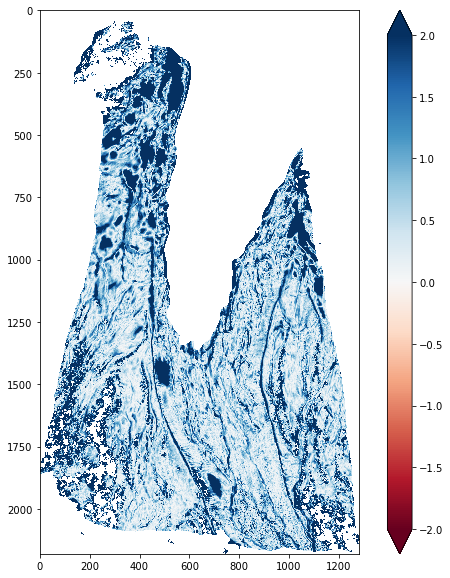

In [35]:
# plot difference between pc_align mosaic and high-resolution reference DEM
reference_dem_file_name = '../data/baker_1_m/baker_2015_utm_m.vrt'
aligned_mosaic_file_name = 'output_data/pc_align_output/run-trans_source-DEM.tif'
dem_difference_file_name =  hsfm.utils.difference_dems(aligned_mosaic_file_name, reference_dem_file_name)
hsfm.plot.plot_dem_difference_from_file_name(dem_difference_file_name,
                                            mask_glacier=True,
                                            spread=2)

### Use dem_align to align pc_align mosaic with high-resolution reference DEM

In [36]:
dem_difference_file_name,aligned_dem_file_name = hsfm.utils.dem_align_custom(reference_dem_file_name,
                                                                             aligned_mosaic_file_name, 
                                                                             log_directory='dem_align/')

#### Optional QC

Masking glaciers
Found glacier shp: /home/knuth/data/rgi60/regions/rgi60_merge.shp
Input shp srs: +proj=longlat +datum=WGS84 +no_defs 
Specified output srs: +proj=utm +zone=10 +datum=WGS84 +units=m +no_defs 


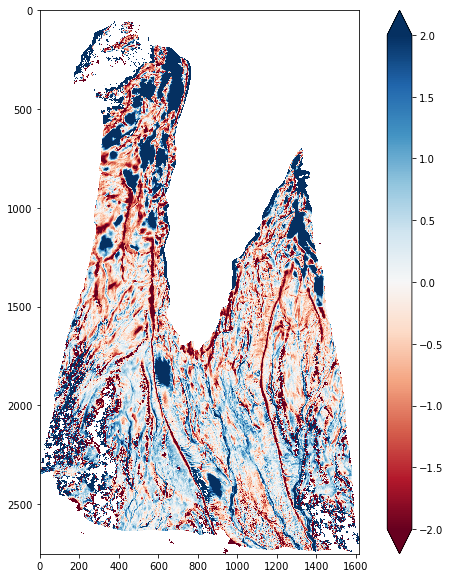

In [39]:
# plot final difference DEM
hsfm.plot.plot_dem_difference_from_file_name(dem_difference_file_name,
                                            mask_glacier=True,
                                            spread=2)